In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ==========================================
# 1. SETUP & DATA LOADING
# ==========================================
print("Step 1: Loading Data...")
# Ensure 'city_day.csv' is in the same folder!
try:
    df = pd.read_csv('city_day.csv')
except FileNotFoundError:
    print("ERROR: 'city_day.csv' not found. Please download it from Kaggle.")
    exit()

df['Date'] = pd.to_datetime(df['Date'])
delhi = df[df['City'] == 'Delhi'].copy()
delhi.set_index('Date', inplace=True)
delhi['AQI'] = delhi['AQI'].interpolate(method='linear')

# Use only AQI column
data = delhi['AQI'].values.reshape(-1, 1)

# ==========================================
# 2. PREPROCESSING
# ==========================================
print("Step 2: Preprocessing...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into Training (Pre-2020) and Testing (2020)
# Roughly 80% split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:] # Include lookback period

def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ==========================================
# 3. TRAINING THE LSTM MODEL
# ==========================================
print("Step 3: Training LSTM Model (This may take time)...")
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ==========================================
# 4. PREDICTIONS & CODE GENERATION
# ==========================================
print("Step 4: Generating Forecasts...")
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # Convert back to AQI numbers
actuals = scaler.inverse_transform(y_test.reshape(-1, 1))

# Take the last 15 days for the website graph
last_15_pred = predictions[-15:].flatten().astype(int).tolist()
last_15_actual = actuals[-15:].flatten().astype(int).tolist()

print("\n" + "="*50)
print("SUCCESS! COPY THE CODE BELOW INTO YOUR INDEX.HTML")
print("="*50)
print(f"""
// Find the 'Prediction Chart' section in index.html and replace 'data: [...]' with this:

datasets: [
    {{
        label: 'Actual Values',
        data: {last_15_actual},
        borderColor: '#10b981',
        borderWidth: 2
    }},
    {{
        label: 'LSTM Predicted',
        data: {last_15_pred},
        borderColor: '#6366f1',
        borderWidth: 2,
        borderDash: [5, 5]
    }}
]
""")
print("="*50)

Step 1: Loading Data...
Step 2: Preprocessing...
Step 3: Training LSTM Model (This may take time)...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0557
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0134
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0127
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0129
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0118
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0115
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0105
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0103
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0109
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0101
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0095
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0102
Epoch 13/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0090
Epoch 14/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0090
Epoch 15/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0097
Epoch 16/20
49/

# Task
Create a line chart showing the `last_15_actual` and `last_15_pred` AQI values, with distinct lines and a legend to differentiate between actual and predicted data.

## Visualize Actual vs. Predicted AQI

### Subtask:
Generate a plot comparing the `last_15_actual` and `last_15_pred` AQI values using a line chart. The plot should clearly distinguish between actual and predicted values with appropriate labels and a legend.


**Reasoning**:
The subtask requires visualizing the actual vs. predicted AQI values. I will use `matplotlib.pyplot` to create a line chart as instructed, plotting both `last_15_actual` and `last_15_pred` with appropriate labels, titles, and a legend.



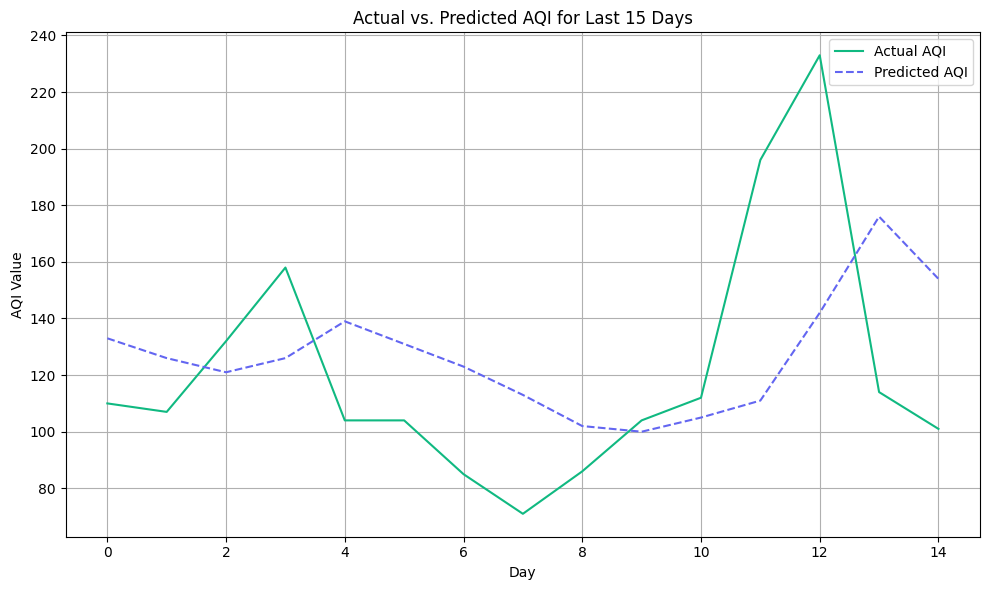

In [2]:
import matplotlib.pyplot as plt

# Create a new figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot last_15_actual
ax.plot(range(len(last_15_actual)), last_15_actual, label='Actual AQI', color='#10b981')

# Plot last_15_pred
ax.plot(range(len(last_15_pred)), last_15_pred, label='Predicted AQI', color='#6366f1', linestyle='--')

# Set the title and labels
ax.set_title('Actual vs. Predicted AQI for Last 15 Days')
ax.set_xlabel('Day')
ax.set_ylabel('AQI Value')

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the visualization of the actual and predicted AQI values.


## Summary:

### Data Analysis Key Findings
*   A line chart was successfully generated comparing the `last_15_actual` and `last_15_pred` Air Quality Index (AQI) values for the last 15 days.
*   The chart clearly distinguishes between "Actual AQI" (solid green line) and "Predicted AQI" (dashed purple line) using distinct colors and line styles, along with a legend.
*   The visualization effectively allows for a direct comparison of the actual and predicted AQI values over the 15-day period.

### Insights or Next Steps
*   **Insight:** The visualization provides an immediate qualitative understanding of how well the predicted AQI values align with the actual AQI, highlighting trends and potential discrepancies over the last 15 days.
*   **Next Step:** To further evaluate the prediction model's performance, quantitative metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared should be calculated.
